In [104]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Problem Statement: Predicting Customer Churn in a Credit Card Service**

A leading bank providing credit card services has observed an increasing number of customers leaving their credit card programs. The bank is keen on proactively addressing customer concerns and preventing churn. To achieve this, they are seeking a predictive model that can identify customers likely to churn. The dataset comprises information from 10,000 customers, including features such as age, salary, marital status, credit card limit, and credit card category.

### Objectives:

1. **Churn Prediction:**
   - Develop a machine learning model capable of predicting whether a customer is likely to churn from the credit card services.

2. **Model Selection:**
   - Implement and compare the performance of three different machine learning algorithms: Decision Trees, Random Forests, and Support Vector Machines (SVM). Evaluate each model's ability to handle the imbalanced nature of the dataset.

3. **Feature Importance:**
   - Investigate and interpret feature importance to understand which factors contribute significantly to customer churn.

4. **Proactive Intervention:**
   - Utilize the developed models to identify customers at high risk of churning. Design proactive intervention strategies to retain these customers.

### Dataset Information:

- **Source:** Obtained from https://leaps.analyttica.com/home.
- **Size:** 10,000 customers with nearly 18 features.
- **Features:**
  - Age, Salary, Marital Status, Credit Card Limit, Credit Card Category, and others.

### Challenges:

- **Imbalanced Data:**
  - Only 16.07% of customers have churned, posing a challenge for training predictive models. Address the class imbalance appropriately.

### Steps:

1. **Data Exploration:**
   - Explore the distribution of features and identify patterns related to churn.

2. **Data Preprocessing:**
   - Handle missing values, encode categorical variables, and scale numerical features.

3. **Imbalanced Data Handling:**
   - Employ techniques such as oversampling, undersampling, or using algorithms robust to class imbalance.

4. **Model Training:**
   - Implement Decision Trees, Random Forests, and SVM for churn prediction.
   - Optimize hyperparameters for each algorithm.

5. **Feature Importance Analysis:**
   - Assess the importance of features in each model to understand the key factors influencing churn.

6. **Proactive Measures:**
   - Develop strategies for proactive customer engagement based on model predictions.
   - Consider personalized offers or incentives to retain high-risk customers.

7. **Evaluation:**
   - Evaluate the performance of each model using metrics such as precision, recall, and F1-score.
   - Validate the models on a separate test set.

8. **Continuous Improvement:**
   - Monitor model performance over time.
   - Refine the models based on new data and real-world outcomes.

The successful implementation of this predictive model will enable the bank to identify potential churners early and implement targeted interventions, ultimately improving customer retention and satisfaction.

Certainly! Let's walk through a logical approach to using decision trees for predicting customer churn in this credit card service use case with the given columns:

### 1. Data Exploration and Preprocessing:

#### a. Data Inspection:
- **Check for Missing Values:** Identify and handle any missing values in the dataset.
- **Understand Data Types:** Ensure that the data types of each column are appropriate.

#### b. Feature Engineering:
- **Derived Features:** Consider creating any new features that might enhance predictive power (e.g., customer tenure based on "Months_on_book").

#### c. Handling Categorical Variables:
- **One-Hot Encoding:** Encode categorical variables like "Gender," "Education_Level," "Marital_Status," "Income_Category," and "Card_Category" using one-hot encoding.

#### d. Scaling:
- **Numerical Features:** Scale numerical features like "Credit_Limit," "Avg_Open_To_Buy," etc., to bring them to a similar scale.

### 2. Split the Data:
- **Train-Test Split:** Split the dataset into training and testing sets to assess model performance.

### 3. Build the Decision Tree Model:

#### a. Define Target Variable:
- **Attrition_Flag:** Set this as the target variable.

#### b. Features and Labels:
- **Features:** Use the remaining columns as features for predicting churn.
- **Labels:** The target variable, "Attrition_Flag," will be the label to predict.

#### c. Model Training:
- **Train the Decision Tree Model:** Use the training set to train the decision tree model.

#### d. Hyperparameter Tuning:
- **Optimize Parameters:** Experiment with hyperparameters like tree depth, minimum samples per leaf, etc., to optimize the model's performance.

### 4. Evaluate the Model:

#### a. Model Performance Metrics:
- **Confusion Matrix:** Evaluate precision, recall, and F1-score.
- **ROC Curve:** Assess the trade-off between true positive rate and false positive rate.

#### b. Feature Importance:
- **Extract Feature Importance Scores:** Understand which features contribute most to predicting customer churn.

### 5. Interpretation and Proactive Measures:

#### a. Interpretation:
- **Analyze Tree Structure:** Understand the decision rules and splits created by the decision tree.

#### b. Proactive Measures:
- **Identify High-Risk Customers:** Use the decision tree to identify customers at high risk of churn.
- **Design Proactive Strategies:** Develop proactive strategies (e.g., personalized offers) to retain high-risk customers.

### 6. Continuous Improvement:

#### a. Monitoring:
- **Monitor Model Performance:** Keep track of model performance on new data and adjust as needed.

#### b. Feedback Loop:
- **Incorporate Feedback:** Incorporate feedback from proactive measures to continuously refine the model.

This logical flow provides a structured approach to implementing a decision tree model for predicting customer churn in the given credit card service use case. It ensures thorough data exploration, effective model training, and actionable insights for proactive customer retention.

# 1. Data Exploration and Preprocessing

In [105]:
input_data = pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv' , na_values=['NaN'])

In [106]:
input_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [107]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [108]:
input_data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [109]:
df=  input_data
null_values = df.isnull().sum()

# Display the columns with null values
columns_with_null = null_values[null_values > 0].index

# Display the count of null values for each column
print("Columns with Null Values:")
print(columns_with_null)

# Display the count of null values for each column
print("\nCount of Null Values for Each Column:")
print(null_values[columns_with_null])

Columns with Null Values:
Index([], dtype='object')

Count of Null Values for Each Column:
Series([], dtype: int64)


In [110]:
# Find the mode (most common value) for each column
exclude_columns = ['CLIENTNUM']

# Find the mode (most common value) for each column except the specified ones
modes_except_excluded = df.drop(exclude_columns, axis=1).mode()
# pd.set_option('display.max_columns', None)
modes_except_excluded
# pd.reset_option('display.max_columns')

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,Existing Customer,44.0,F,3.0,Graduate,Married,Less than $40K,Blue,36.0,3.0,...,34516.0,0.0,1438.3,0.791,4253,81.0,0.667,0.0,0.000199,0.99989
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4509,NaN,NaN,NaN,NaN,NaN


**algothim without data preprocessing steps**

# Data pre-processing that can be applied
If your data does not have any null values, that's a good start. However, data preprocessing involves more than just handling missing values. Here are some additional data preprocessing techniques you might consider:

1. **Handling Duplicates:**
   - Check for and remove duplicate rows if they exist in your dataset.

2. **Data Type Conversion:**
   - Ensure that the data types of each column are appropriate. For example, convert categorical variables to the `category` type if they are not already.

3. **Feature Scaling:**
   - Depending on the algorithms you plan to use, consider scaling numerical features. Common methods include Min-Max scaling or standardization (Z-score normalization).

4. **Outlier Detection and Removal:**
   - Identify and handle outliers in your data. You can use statistical methods or visualization techniques to detect outliers.

5. **Encoding Categorical Variables:**
   - If your dataset contains categorical variables, encode them into numerical format. Common methods include one-hot encoding or label encoding.

6. **Feature Engineering:**
   - Create new features that might be informative for your specific problem. For example, derive features based on existing ones, such as creating age groups from the "Customer_Age" column.

7. **Normalization of Skewed Data:**
   - If your data is highly skewed, you might consider applying transformations (e.g., logarithmic transformation) to make the distribution more normal.

8. **Handling Imbalanced Classes:**
   - If you are working on a classification problem and your classes are imbalanced, consider techniques like oversampling, undersampling, or using specialized algorithms that handle imbalanced classes.

9. **Binning or Discretization:**
   - For numerical features, you might consider binning or discretization to convert continuous variables into discrete intervals.

10. **Remove Irrelevant Columns:**
    - If certain columns are irrelevant to your analysis or prediction task, consider removing them to reduce the dimensionality of your dataset.

11. **Data Exploration and Visualization:**
    - Perform exploratory data analysis (EDA) to gain insights into your data. Visualization techniques can help you understand relationships between variables.

Remember, the specific preprocessing steps depend on the nature of your data and the requirements of your analysis or modeling task. Always assess the impact of each preprocessing step on your final results.

In [111]:
df = df.drop_duplicates()

In [112]:
object_columns_to_convert = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Convert specified object columns to categorical
df[object_columns_to_convert] = df[object_columns_to_convert].astype('category')

# Display data types after conversion
print("Data Types after Conversion:")
print(df.dtypes)

Data Types after Conversion:
CLIENTNUM                                                                                                                                int64
Attrition_Flag                                                                                                                        category
Customer_Age                                                                                                                             int64
Gender                                                                                                                                category
Dependent_count                                                                                                                          int64
Education_Level                                                                                                                       category
Marital_Status                                                                                                   

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Assuming your DataFrame is df

# Split the data into features (X) and target variable (y)
X = df.drop("Attrition_Flag", axis=1)
y = df["Attrition_Flag"]

# Identify categorical columns with data type 'category'
categorical_columns = X.select_dtypes(include=['category']).columns.tolist()

# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]))
X_encoded.columns = encoder.get_feature_names_out(categorical_columns)
X = pd.concat([X.drop(categorical_columns, axis=1), X_encoded], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_resampled, y_resampled)
logistic_predictions = logistic_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_resampled, y_resampled)
dt_predictions = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)
rf_predictions = rf_model.predict(X_test)

# SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_resampled, y_resampled)
svm_predictions = svm_model.predict(X_test)

# Evaluate the models (use appropriate metrics for your problem)
models = {
    'Logistic Regression': logistic_predictions,
    'Decision Tree': dt_predictions,
    'Random Forest': rf_predictions,
    'SVM': svm_predictions
}

for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label='Attrited Customer')
    recall = recall_score(y_test, predictions, pos_label='Attrited Customer')
    f1 = f1_score(y_test, predictions, pos_label='Attrited Customer')

    # Display evaluation metrics
    print(f"Metrics for {model_name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("\n")

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics for Logistic Regression:
Accuracy: 0.836788417242514
Precision: 0.0
Recall: 0.0
F1-score: 0.0


Metrics for Decision Tree:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


Metrics for Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


Metrics for SVM:
Accuracy: 0.38960184271141823
Precision: 0.17658257972394098
Recall: 0.7479838709677419
F1-score: 0.2857142857142857




# Feature scaling does not affect random forests

In a Random Forest, the underlying model consists of a collection of decision trees. Decision trees make binary decisions at each node based on a threshold for a specific feature. The decision-making process in a tree is solely dependent on the order of the features and their relationships, not on the absolute scale of the features.

# Random forest are robust to outliers
Random Forests, as an ensemble of decision trees, are less sensitive to outliers compared to some other models. The nature of decision trees makes them inherently robust to isolated extreme values.

So if applied assess the impact of outlier removal on model performance using techniques like cross-validation. Ensure that the removal of outliers improves model generalization rather than overfitting to the training data.

Lets only try to find outliers in data.

In [115]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df_outlier = pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv')

# Exclude 'CLIENTNUM' and 'Attrition_Flag' columns
columns_to_exclude = ['CLIENTNUM', 'Attrition_Flag']
columns_for_outlier_detection = [col for col in df_outlier.columns if col not in columns_to_exclude]

# Select numerical and categorical columns for outlier detection
numerical_columns = df_outlier[columns_for_outlier_detection].select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df_outlier[columns_for_outlier_detection].select_dtypes(include=['category']).columns

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df_outlier[col + '_encoded'] = label_encoder.fit_transform(df_outlier[col])

# Combine numerical and encoded categorical columns
selected_columns = list(numerical_columns) + list(df_outlier.columns[df_outlier.columns.str.endswith('_encoded')])

# Extract features
X = df_outlier[selected_columns]

# Initialize the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and predict outliers
df_outlier['is_outlier'] = isolation_forest.fit_predict(X)

# Display the outliers
outliers = df_outlier[df_outlier['is_outlier'] == -1]
print("Number of outliers:", len(outliers))
outliers

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of outliers: 507


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,is_outlier
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,-1
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,-1
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,-1
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,-1
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.999880,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10107,713924283,Attrited Customer,61,M,0,Graduate,Single,$60K - $80K,Blue,54,...,1644,10215.0,0.866,8930,79,0.837,0.139,0.992680,0.007320,-1
10112,708564858,Attrited Customer,33,M,2,College,Married,$120K +,Gold,20,...,0,34516.0,1.004,9338,73,0.622,0.000,0.994380,0.005620,-1
10113,713733633,Attrited Customer,27,M,0,High School,Divorced,$60K - $80K,Blue,36,...,2517,10786.0,0.929,10219,85,0.809,0.189,0.993380,0.006620,-1
10114,720841533,Existing Customer,29,M,0,Graduate,Married,Less than $40K,Blue,15,...,0,4700.0,0.617,14723,96,0.655,0.000,0.000235,0.999770,-1


# Label Encoding

In [116]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Identify target variable and features
target_variable = 'Attrition_Flag'
columns_to_exclude = [target_variable]

# Separate target variable (Y) and input features (X)
Y = df[target_variable]
X = df.drop(columns=columns_to_exclude)

# Handle label encoding for the target variable (Y)
label_encoder_y = LabelEncoder()
Y_encoded = label_encoder_y.fit_transform(Y)

# Identify categorical columns for one-hot encoding
categorical_columns = X.select_dtypes(include=['category']).columns

# Handle one-hot encoding for categorical features in input features (X)
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded_categorical = pd.DataFrame(one_hot_encoder.fit_transform(X[categorical_columns]))
X_encoded_categorical.columns = one_hot_encoder.get_feature_names_out(categorical_columns)

# Combine the one-hot encoded categorical features with the original 'CLIENTNUM' and numerical features
X_encoded = pd.concat([X.select_dtypes(include=['int64', 'float64']), X_encoded_categorical], axis=1)

# Display the encoded data
print("Encoded Target Variable (Y):")
print(Y_encoded[:5])  # Display the first 5 rows for illustration

print("\nEncoded Input Features (X):")
print(X_encoded.head())

Encoded Target Variable (Y):
[1 1 1 1 1]

Encoded Input Features (X):
   CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
0  768805383            45                3              39   
1  818770008            49                5              44   
2  713982108            51                3              36   
3  769911858            40                4              34   
4  709106358            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  ...  \
0       12691.0     

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [117]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and categorical_columns is a list of categorical column names
categorical_columns = df.select_dtypes(include=['category']).columns

# Initialize an empty dictionary to store mappings
encoded_mappings = {}

# Loop through each categorical column
for col in categorical_columns:
    # Initialize label encoder for the current column
    label_encoder_col = LabelEncoder()

    # Fit and transform the current column
    df[col + '_encoded'] = label_encoder_col.fit_transform(df[col])

    # Store the mapping in the dictionary
    encoded_mappings[col] = dict(zip(label_encoder_col.classes_, label_encoder_col.transform(label_encoder_col.classes_)))

# Print the mappings for all categorical columns
for col, mapping in encoded_mappings.items():
    print(f"\n{col} - Encoded Mapping:")
    for key, value in mapping.items():
        print(f"{key}: {value}")


Attrition_Flag - Encoded Mapping:
Attrited Customer: 0
Existing Customer: 1

Gender - Encoded Mapping:
F: 0
M: 1

Education_Level - Encoded Mapping:
College: 0
Doctorate: 1
Graduate: 2
High School: 3
Post-Graduate: 4
Uneducated: 5
Unknown: 6

Marital_Status - Encoded Mapping:
Divorced: 0
Married: 1
Single: 2
Unknown: 3

Income_Category - Encoded Mapping:
$120K +: 0
$40K - $60K: 1
$60K - $80K: 2
$80K - $120K: 3
Less than $40K: 4
Unknown: 5

Card_Category - Encoded Mapping:
Blue: 0
Gold: 1
Platinum: 2
Silver: 3


# Handling Skewness in data
Skewness might have minimal impact on the performance of Random Forests compared to some other machine learning algorithms.
The ensemble nature of Random Forests, where multiple trees are combined, helps to mitigate the effects of outliers and skewed distributions.

While Random Forests are generally robust to skewness, you might still consider transforming features in certain cases:
As in our data there are particular features **showing extreme skewness** and the distribution significantly deviates from normality.

In [118]:
from scipy.stats import skew

skewness = skew(X_encoded)
print(f"Skewness: {skewness}")


Skewness: [ 9.95453537e-01 -3.36000386e-02 -2.08224508e-02 -1.06549575e-01
 -1.62428352e-01  6.32967357e-01  1.10039960e-02  1.66647892e+00
 -1.48815204e-01  1.66145041e+00  1.73180685e+00  2.04070108e+00
  1.53650306e-01  2.06372483e+00  7.17901642e-01  1.84826460e+00
 -1.84826460e+00  1.16519947e-01  4.41601128e+00  8.27316722e-01
  1.50959913e+00  4.08407364e+00  1.99561091e+00  1.96044634e+00
  1.49124173e-01  4.53830550e-01  3.25585043e+00  1.69477061e+00
  2.09378609e+00  1.94320578e+00  6.21452659e-01  2.49606978e+00
  9.18222802e+00  2.24355071e+01  3.91213860e+00]


From out observations there are both right and left skewed columns

**Box-Cox Transformation:**

A family of power transformations that includes logarithm and square root as special cases.
Suitable for both positively and negatively skewed data.

**Logarithmic transformation:**
The logarithmic transformation is a power transformation suitable for handling positively skewed data. By compressing larger values, it mitigates right skewness. Its monotonic increasing nature makes it effective in normalizing data and stabilizing variances, especially useful in financial analysis. The logarithmic function is commonly applied to variables with large values, contributing to improved interpretability in regression analysis.

In [119]:
# import numpy as np
# from scipy.stats import boxcox
# import pandas as pd

# # Assuming 'X_encoded' is your DataFrame with numerical features
# # Make sure there are no zero or negative values in 'X_encoded'

# # Create an empty DataFrame to store transformed values
# X_encoded_transformed = pd.DataFrame()

# # Loop through each numerical feature and apply Box-Cox transformation
# for col in X_encoded.columns:
#     # Add a small constant to ensure all values are positive
#     feature_data_positive = X_encoded[col] + 0.0001
    
#     # Apply Box-Cox transformation to the feature
#     transformed_data, lambda_value = boxcox(feature_data_positive)
    
#     # Add the transformed feature to the new DataFrame
#     X_encoded_transformed[col] = transformed_data

# # Display the transformed data
# print(X_encoded_transformed)

In [120]:
import numpy as np
import pandas as pd

# Assuming 'X_encoded' is your DataFrame with numerical features
# Make sure there are no zero or negative values in 'X_encoded'

# Create an empty DataFrame to store transformed values
X_encoded_transformed = pd.DataFrame()

# Loop through each numerical feature and apply logarithmic transformation
for col in X_encoded.columns:
    # Add a small constant to ensure all values are positive
    feature_data_positive = X_encoded[col] + 0.0001
    
    # Apply logarithmic transformation to the feature
    transformed_data = np.log1p(feature_data_positive)
    
    # Add the transformed feature to the new DataFrame
    X_encoded_transformed[col] = transformed_data

# Display the transformed data
print(X_encoded_transformed)

       CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
0      20.460348      3.828644         1.386319        3.688882   
1      20.523314      3.912025         1.791776        3.806665   
2      20.386368      3.951246         1.386319        3.610921   
3      20.461787      3.713575         1.609458        3.555351   
4      20.379516      3.713575         1.386319        3.091047   
...          ...           ...              ...             ...   
10122  20.464970      3.931828         1.098646        3.713575   
10123  20.381674      3.737672         1.098646        3.258100   
10124  20.389897      3.806665         0.693197        3.610921   
10125  20.391154      3.433990         1.098646        3.610921   
10126  20.386866      3.784192         1.098646        3.258100   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                      1.791776                0.693197   
1                      1.945924                0.693197   
2                 

In [121]:
import pandas as pd

# Assuming Y_encoded is a 1D NumPy array
Y_encoded_series = pd.Series(Y_encoded)

# Now you can use value_counts()
class_counts = Y_encoded_series.value_counts()
print(class_counts)

1    8500
0    1627
Name: count, dtype: int64


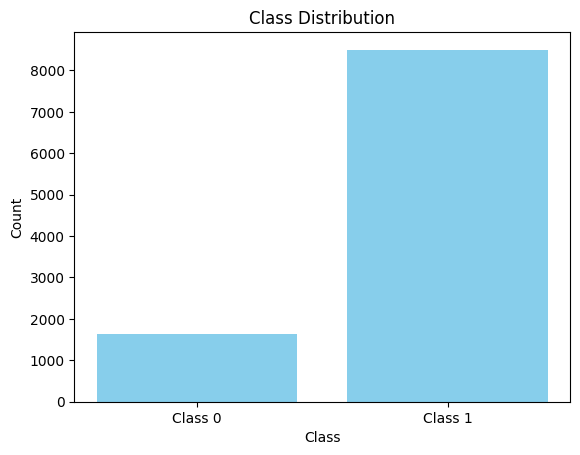

In [122]:
import matplotlib.pyplot as plt

# Assuming Y_encoded is your encoded target variable
unique_classes = np.unique(Y_encoded)

# Assuming you have a mapping of class names
class_names = ['Class {}'.format(cls) for cls in unique_classes]

# Assuming class_counts is the result of Y_encoded_series.value_counts()
class_counts = Y_encoded_series.value_counts()

# Plotting
plt.bar(class_counts.index, class_counts.values, color='skyblue')  # Adjust color as needed

# Setting x-ticks to show class names dynamically
plt.xticks(unique_classes, class_names)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

Weighted Classes:

Assign different weights to classes to make the algorithm more sensitive to the minority class. Many machine learning algorithms, especially in libraries like scikit-learn, allow you to set class weights.

Oversampling:

In [123]:
from imblearn.over_sampling import SMOTE


Random Forest itself is a tree-based ensemble algorithm and inherently comes with a built-in feature selection mechanism. The feature importance scores provided by Random Forest can be used to identify which features are contributing the most to the model's performance. In this context, you can consider feature selection as part of the modeling process.

In [124]:
len(X_encoded)

10127

In [125]:
len(Y_encoded)

10127

Top 10 features:
                                              Feature  Importance
15  Naive_Bayes_Classifier_Attrition_Flag_Card_Cat...    0.415994
16  Naive_Bayes_Classifier_Attrition_Flag_Card_Cat...    0.369047
12                                     Total_Trans_Ct    0.046949
11                                    Total_Trans_Amt    0.038163
8                                 Total_Revolving_Bal    0.038086
13                                Total_Ct_Chng_Q4_Q1    0.027685
14                              Avg_Utilization_Ratio    0.019387
4                            Total_Relationship_Count    0.011160
10                               Total_Amt_Chng_Q4_Q1    0.006719
6                               Contacts_Count_12_mon    0.005421


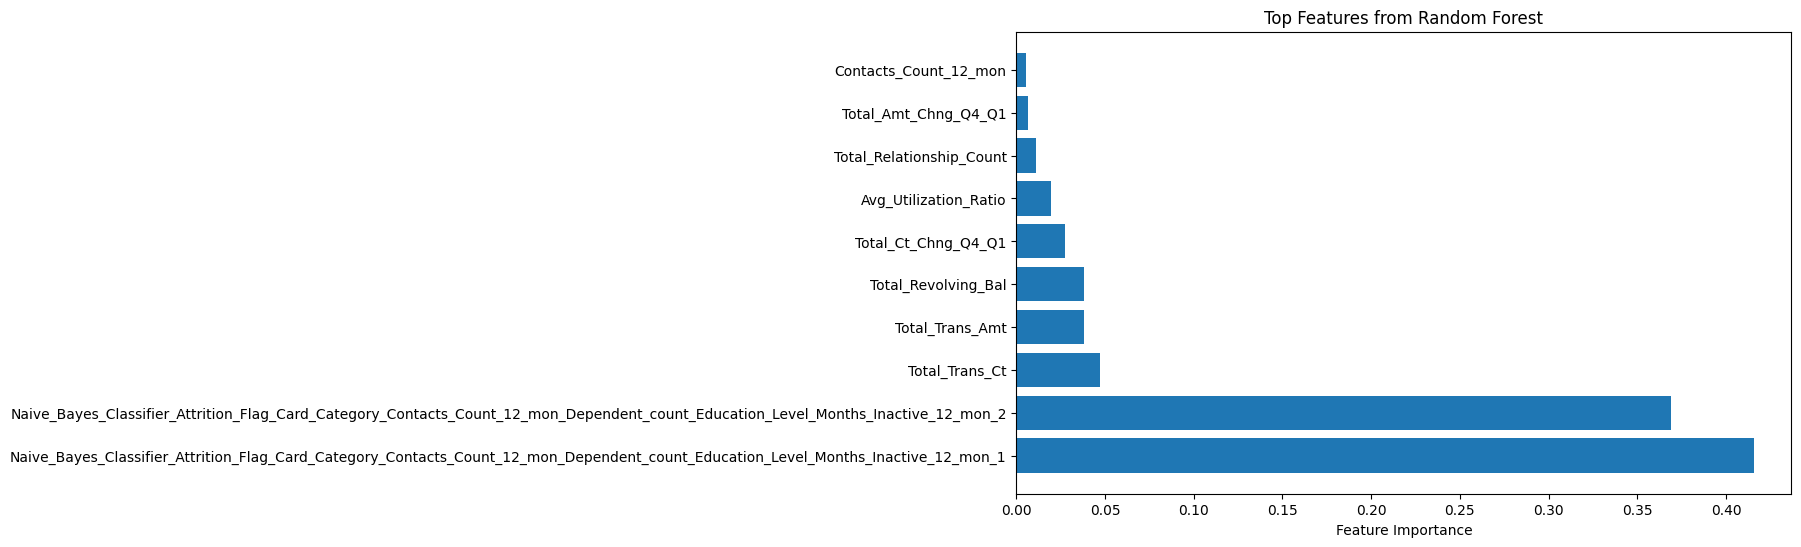

In [126]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X is your feature matrix and y is your target variable
model = RandomForestClassifier(random_state=42)
model.fit(X_encoded, Y_encoded)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame(
    {'Feature': X_encoded.columns, 'Importance': feature_importances}
)

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N features
top_features = 10  # You can adjust this value based on your preference

# Print the top features
print("Top", top_features, "features:")
print(feature_importance_df.head(top_features))

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_features), feature_importance_df['Importance'][:top_features], align='center')
plt.yticks(range(top_features), feature_importance_df['Feature'][:top_features])
plt.xlabel('Feature Importance')
plt.title('Top Features from Random Forest')
plt.show()

**EDA**

In [127]:
# Display descriptive statistics for selected features
selected_features = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt']
print(X_encoded[selected_features].describe())

       Customer_Age  Credit_Limit  Total_Trans_Amt
count  10127.000000  10127.000000     10127.000000
mean      46.325960   8631.953698      4404.086304
std        8.016814   9088.776650      3397.129254
min       26.000000   1438.300000       510.000000
25%       41.000000   2555.000000      2155.500000
50%       46.000000   4549.000000      3899.000000
75%       52.000000  11067.500000      4741.000000
max       73.000000  34516.000000     18484.000000


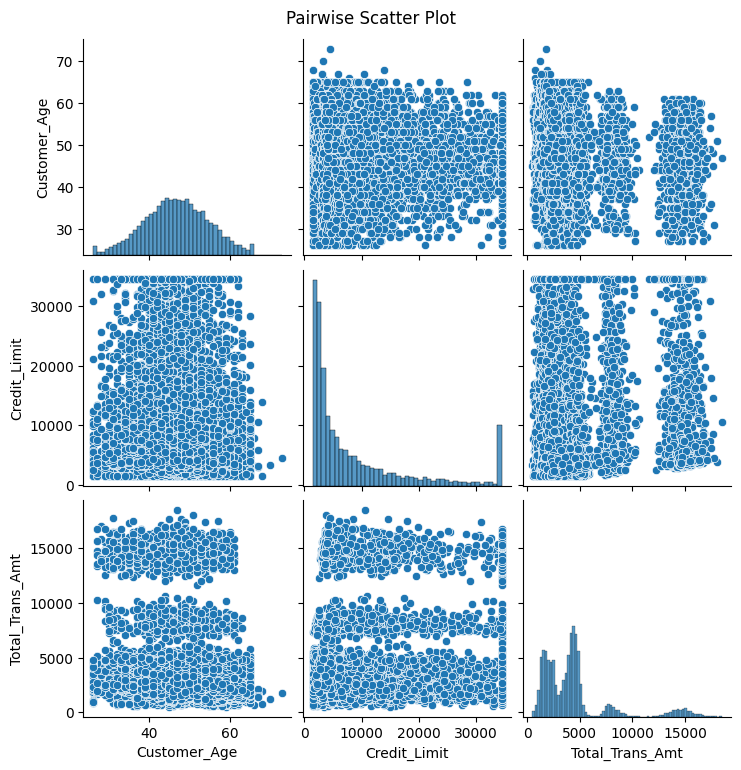

In [128]:
import seaborn as sns
# Pairwise scatter plot for selected features
sns.pairplot(X_encoded[selected_features])
plt.suptitle('Pairwise Scatter Plot', y=1.02)
plt.show()

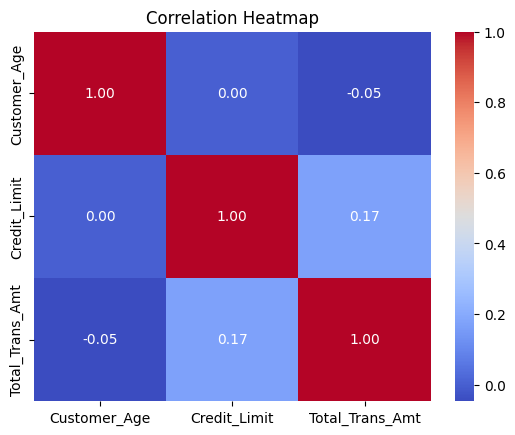

In [129]:
# Correlation heatmap for selected features
correlation_matrix = X_encoded[selected_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

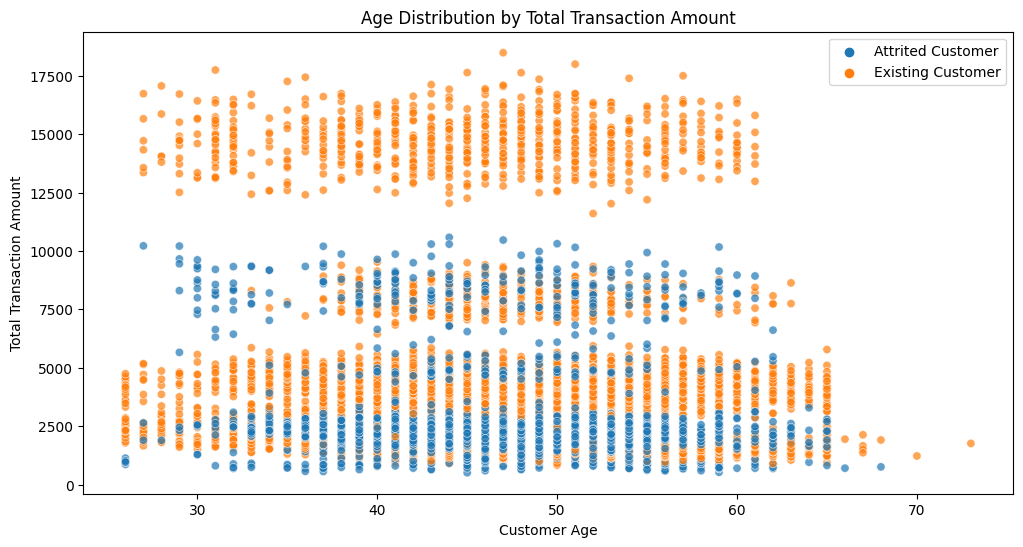

In [130]:
# Age distribution by Total Transaction Amount
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Customer_Age', y='Total_Trans_Amt', data=df, hue='Attrition_Flag', alpha=0.7)
plt.title('Age Distribution by Total Transaction Amount')
plt.xlabel('Customer Age')
plt.ylabel('Total Transaction Amount')
plt.legend()
plt.show()

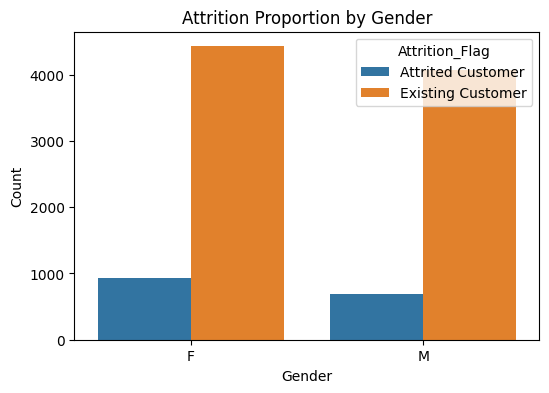

In [131]:
# Plot attrition proportion by gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Attrition_Flag', data=df)
plt.title('Attrition Proportion by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

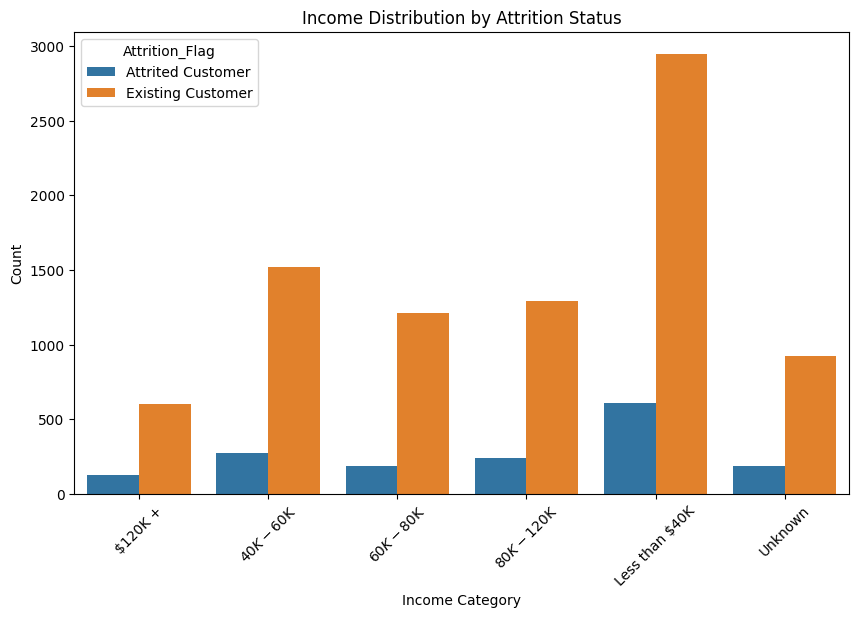

In [132]:
# Plot income distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Income_Category', hue='Attrition_Flag', data=df)
plt.title('Income Distribution by Attrition Status')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_transformed, Y_encoded, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with balanced class weights
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00      1699

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



In [134]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Define features and target variable
X = X_encoded_transformed
y = Y_encoded

# Initialize the Random Forest Classifier with balanced class weights
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Define the evaluation metrics (precision, recall, F1-score)
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Initialize Stratified K-Fold Cross-Validator
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation using cross_validate
cv_results = cross_validate(rf_model, X, y, cv=stratified_kfold, scoring=scoring_metrics, n_jobs=-1)

# Display cross-validation results
print("Cross-Validation Results:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1-score:", cv_results['test_f1'].mean())

Cross-Validation Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [136]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

# Assuming you have a DataFrame named 'df' with features and a target column 'target'
# Replace 'target_column_name' with the actual name of your target column

# Load your DataFrame or create a sample DataFrame
# For example purposes, let's assume you have a DataFrame with features and target column 'target'
# Replace this with your actual DataFrame
# df = ...

# Separate features and target variable
X = X_encoded_transformed
y = Y_encoded

# Convert y to a Pandas Series
y_series = pd.Series(y)

# Initialize the Random Forest Classifier with balanced class weights
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Define the evaluation metrics (precision, recall, F1-score)
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Initialize Stratified K-Fold Cross-Validator
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform cross-validation using cross_validate with oversampling
cv_results = cross_validate(rf_model, X, y_series, cv=stratified_kfold, scoring=scoring_metrics, n_jobs=-1,
                            fit_params={'sample_weight': y_series.map(lambda x: 1 if x == 0 else 1)})  # Adjust sample_weight based on your problem

# Display cross-validation results
print("Cross-Validation Results:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1-score:", cv_results['test_f1'].mean())

Cross-Validation Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [140]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

# Assuming you have a DataFrame named 'df' with features and a target column 'target'
# Replace 'target_column_name' with the actual name of your target column

# Load your DataFrame or create a sample DataFrame
# For example purposes, let's assume you have a DataFrame with features and target column 'target'
# Replace this with your actual DataFrame
# df = ...

# Separate features and target variable
X = X_encoded_transformed
y = Y_encoded

# Convert y to a Pandas Series
y_series = pd.Series(y)

# Define the evaluation metrics (precision, recall, F1-score)
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Initialize Stratified K-Fold Cross-Validator
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Define the models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(class_weight='balanced', random_state=42)
}

# Perform cross-validation for each model
for model_name, model in models.items():
    # Create a pipeline with SMOTE and the model
    model_pipeline = make_pipeline(SMOTE(random_state=42), model)
    
    # Perform cross-validation using cross_validate with oversampling
    cv_results = cross_validate(model_pipeline, X, y_series, cv=stratified_kfold, scoring=scoring_metrics, n_jobs=-1)
    
    # Display cross-validation results
    print(f"Cross-Validation Results for {model_name}:")
    print("Accuracy:", cv_results['test_accuracy'].mean())
    print("Precision:", cv_results['test_precision'].mean())
    print("Recall:", cv_results['test_recall'].mean())
    print("F1-score:", cv_results['test_f1'].mean())
    print()

Cross-Validation Results for Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Results for Logistic Regression:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Cross-Validation Results for Decision Tree:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Cross-Validation Results for SVM:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0



In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Assuming your DataFrame is df

# Split the data into features (X) and target variable (y)
X = X_encoded_transformed
y = Y_encoded

# Identify categorical columns with data type 'category'
categorical_columns = X.select_dtypes(include=['category']).columns.tolist()

# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]))
X_encoded.columns = encoder.get_feature_names_out(categorical_columns)
X = pd.concat([X.drop(categorical_columns, axis=1), X_encoded], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_resampled, y_resampled)
logistic_predictions = logistic_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_resampled, y_resampled)
dt_predictions = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)
rf_predictions = rf_model.predict(X_test)

# SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_resampled, y_resampled)
svm_predictions = svm_model.predict(X_test)

# Evaluate the models (use appropriate metrics for your problem)
models = {
    'Logistic Regression': logistic_predictions,
    'Decision Tree': dt_predictions,
    'Random Forest': rf_predictions,
    'SVM': svm_predictions
}

for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label=1)
    recall = recall_score(y_test, predictions, pos_label=1)
    f1 = f1_score(y_test, predictions, pos_label=1)

    # Display evaluation metrics
    print(f"Metrics for {model_name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("\n")

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for Logistic Regression:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


Metrics for Decision Tree:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


Metrics for Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


Metrics for SVM:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


